# Final exam - IST 652 - Notebook

Submitted by: Connor Hanan

Date: 12/12/2021 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt 
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

# Loading data sets

## Bus ridership data sets

In [2]:
#Loading 2019 bus route SY36 dataset into Jupyter environment - a security warning will appear. You can ignore it.
#Be patient - it could take up to 2 minutes for the dataset to become available
urldata19="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/datasets/busdata/BusActivity_SY36_2019.zip"
csvdata=requests.get(urldata19,verify=False).content

zf2019 = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
#Dataframe with bus activity data for 2019 for route SY36 is named data2019
data2019=pd.read_csv(zf2019.open("Preprocessed_SY36_2019.csv"))

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Loading 2020 bus route SY36 dataset into Jupyter environment - a security warning will appear. You can ignore it.
#Be patient - it could take up to 2 minutes for the dataset to become available
urldata20="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/datasets/busdata/BusActivity_SY36_2020.zip"
csvdata=requests.get(urldata20,verify=False).content

zf2020 = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
#Dataframe with bus activity data for 2020 for route SY36 is named data2020
data2020=pd.read_csv(zf2020.open("Preprocessed_SY36_2020.csv"))

In [6]:
#Drop some columns that won't be needed
data2019.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)
data2020.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)

In [7]:
data2019.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,NaN,5.483,8,0,8,0.413,1,37100000002,43.043656,-76.150963
1,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000003,43.044280,-76.147495
2,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,2.550,0,0,8,0.716,2,37100000005,43.045336,-76.147419
3,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000006,43.047959,-76.147440
4,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000007,43.049554,-76.148697


In [8]:
data2020.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,NaN,5.533,9,0,9,0.417,1,37100000002,43.043656,-76.150963
1,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000003,43.044280,-76.147495
2,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,4.200,0,0,9,0.705,2,37100000005,43.045336,-76.147419
3,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000006,43.047959,-76.147440
4,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.12,NaN,1,0,10,NaN,2,37100000007,43.049554,-76.148697


In [9]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980551 entries, 0 to 980550
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        980551 non-null  int64  
 1   SCHEDULE_ID          980551 non-null  int64  
 2   SCHEDULE_NAME        980551 non-null  object 
 3   PATTERN_ID           980551 non-null  int64  
 4   ROUTE_NUMBER         980551 non-null  int64  
 5   ROUTE_NAME           980551 non-null  object 
 6   DIRECTION_NAME       980551 non-null  object 
 7   BRANCH               980551 non-null  object 
 8   TRIP_START_TIME      980551 non-null  object 
 9   TIME_PERIOD          980551 non-null  object 
 10  SERVICE_PERIOD       980551 non-null  object 
 11  TRIP_NUMBER          980551 non-null  int64  
 12  TRIP_KEY             980551 non-null  int64  
 13  BLOCK_NUMBER         980551 non-null  int64  
 14  BLOCK_KEY            980551 non-null  int64  
 15  BLOCK_NAME       

In [10]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962566 entries, 0 to 962565
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        962566 non-null  int64  
 1   SCHEDULE_ID          962566 non-null  int64  
 2   SCHEDULE_NAME        962566 non-null  object 
 3   PATTERN_ID           962566 non-null  int64  
 4   ROUTE_NUMBER         962566 non-null  int64  
 5   ROUTE_NAME           962566 non-null  object 
 6   DIRECTION_NAME       962566 non-null  object 
 7   BRANCH               962566 non-null  object 
 8   TRIP_START_TIME      962566 non-null  object 
 9   TIME_PERIOD          962566 non-null  object 
 10  SERVICE_PERIOD       962566 non-null  object 
 11  TRIP_NUMBER          962566 non-null  int64  
 12  TRIP_KEY             962566 non-null  int64  
 13  BLOCK_NUMBER         962566 non-null  int64  
 14  BLOCK_KEY            962566 non-null  int64  
 15  BLOCK_NAME       

## 2019 Syracuse weather data

In [11]:
#Loading Syracuse Weather dataset into Jupyter environment - a security warning will appear. You can ignore it.
url_weatherdata="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/syracuse_2019_weather.csv"
csvweatherdata=requests.get(url_weatherdata,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [12]:
#Setup the weather_2019 dataframe with the data from the weather dataset 
#You still need to set the column that will be the index
weather_2019=pd.read_csv(StringIO(csvweatherdata))

In [13]:
weather_2019.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/1/2019,15.66,0.02,0.0,40,53,21
1,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/2/2019,5.14,0.00,0.0,24,31,18
2,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/3/2019,10.74,0.09,0.3,33,37,30
3,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/4/2019,4.70,0.00,0.0,36,49,25
4,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/5/2019,5.59,0.00,0.0,33,44,25


# Exam task solutions

Add the text/code/visualizations for your exam tasks solutions from this point onwards. Use as many additional cells as required. Please place long textual explanations or analysis in their own markdown cells, not as comments inside your code cells.

# Task 0 (10 pts.)

**_Basketball Analysis Group_**

1. Shooting efficiency has changed over time, from predominantly inside the 3 pt. arc to outside, especially due to Steph Curry and his revolutionization of the game.

1. Shooting from inside the restricted area has the highest shooting percentage, and therefore one of the highest shooting efficiencies. I believe it was ~60% shooting accuracy in the restricted area, which equates to about 1.2 points per shot from said location.

1. Players have started to change their shooting habits - but not everyone successfully. Some players have made their mark by being more efficient than the average in a certain shot (the midrange jumper, for example). However, since the 3-pointer has become so efficient, most players are starting to migrate towards shooting them. This will occur until a time when teams become better at denying the 3 point shot, where there will be another migration to back inside the arc.

# Task 1 (30 pts.)

In [40]:
import datetime #needed for later

In [15]:
data_2019 = data2019 #make copy
data_2019.columns = data_2019.columns.str.lower() #rename columns for ease
data_2019.trip_start_time = pd.to_datetime(data_2019.trip_start_time) #convert to datetime
data_2019 = data_2019.set_index("trip_start_time") #set index
data_2019.head()

,serial_number,schedule_id,schedule_name,pattern_id,route_number,route_name,direction_name,branch,time_period,service_period,...,dwell_time,running_time_actual,passengers_on,passengers_off,passengers_in,timepoint_miles,first_last_stop,unique_id,stop_lat,stop_lon
trip_start_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 07:40:00,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,AM Peak,Sunday,...,NaN,5.483,8,0,8,0.413,1,37100000002,43.043656,-76.150963
2019-01-01 07:40:00,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,AM Peak,Sunday,...,0.0,NaN,0,0,8,NaN,2,37100000003,43.044280,-76.147495
2019-01-01 07:40:00,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,AM Peak,Sunday,...,0.0,2.550,0,0,8,0.716,2,37100000005,43.045336,-76.147419
2019-01-01 07:40:00,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,AM Peak,Sunday,...,0.0,NaN,0,0,8,NaN,2,37100000006,43.047959,-76.147440
2019-01-01 07:40:00,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,AM Peak,Sunday,...,0.0,NaN,0,0,8,NaN,2,37100000007,43.049554,-76.148697


In [16]:
stops_2019 = data_2019.groupby(["stop_id"]).resample("D").sum().passengers_on
stops_2019.head()

stop_id  trip_start_time
-49      2019-12-16         8
         2019-12-17         7
         2019-12-18         8
         2019-12-19         8
         2019-12-20         5
Name: passengers_on, dtype: int64

**_Above:_** I grouped the data by stop_id, then resampled by day (since I had already set the index to a datetime formatted column). In the resampling, I chose to use a sum (prompt asked for total by day), and then selected just the relevant column.

_**Below** (continued from above):_ In order to extract the stop id for further operation independent of the date, I had to liberate it from its role as the index. I am sure there was a way to do this with leaving it as the index, but I didn't quite know how to operate on a multi-index, so I took the smple route.

In [17]:
stops_2019 = stops_2019.reset_index() #reset index to access datetime
stops_2019

,stop_id,trip_start_time,passengers_on
0,-49,2019-12-16,8
1,-49,2019-12-17,7
2,-49,2019-12-18,8
3,-49,2019-12-19,8
4,-49,2019-12-20,5
...,...,...,...
58812,17824,2019-12-28,0
58813,17824,2019-12-29,0
58814,17824,2019-12-30,0
58815,17824,2019-12-31,0


In [18]:
stops_2019.groupby(["stop_id"]).passengers_on.mean().sort_values(ascending = False)

stop_id
17661    167.396175
3761      80.587432
629       25.366120
727       24.368852
1114      22.374317
            ...    
854        0.002740
17657      0.000000
17659      0.000000
17640      0.000000
840        0.000000
Name: passengers_on, Length: 162, dtype: float64

**_Above:_** Once the stop id has been extracted from its position as the index, it is a simple matter of grouping by stop id, then taking the average of the passengers_on column in order to get the overall average (since they had already been summed up by day). A final sort revealed the stops with the highest average number of passengers getting on, which far exceeds the requirement of 5 set forth by the prompt.

_**Below** (continued from above):_ Once the stop id had been found, it is a simple matter of returning to the base dataset and filtering all values that match the stop id via the use of subsetting. I also needed the day part of the datetime object (the index, at this point) so I needed to reset the index so that I could extract it using the datetime module imported earlier. Once I had what I needed, I could set the index back to the datetime object and create a series to check the number of days prior to comparing it to the weather dataset.

In [19]:
#stop id 17661
bus_stop = data_2019[data_2019.stop_id == 17661] #filtering using subsetting
bus_stop = bus_stop.reset_index() #reset index
bus_stop["day"] = bus_stop.trip_start_time.dt.date #copy out the day part to new col
bus_stop = bus_stop.set_index("trip_start_time") #set the index back to what it was
date_lookup = bus_stop.day.reset_index(drop=True) #save series out as an object

In [20]:
len(date_lookup.unique()) #check length of series

#366 days, dropping 1/1/2020

366

In [21]:
bus_stop = bus_stop[bus_stop.day != datetime.date(2020, 1, 1)] #drop the day not in the same year
bus_stop.day.unique().size #check size again

365

In [22]:
weather2019 = weather_2019 #save copy of weather
weather2019.columns = weather2019.columns.str.lower() #rename all cols to lower
weather2019.date = pd.to_datetime(weather2019.date) #convert to datetime

In [23]:
weather2019["day"] = weather2019.date.dt.date #same process as above -> extract date
weather2019 = weather2019.set_index("date") #set index
display(weather2019.day.unique().size) #check and print size of day part series
display(weather2019.head()) #take a peek at the data

365

,station,name,awnd,prcp,snow,tavg,tmax,tmin,day
date,,,,,,,,,
2019-01-01,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",15.66,0.02,0.0,40,53,21,2019-01-01
2019-01-02,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",5.14,0.00,0.0,24,31,18,2019-01-02
2019-01-03,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",10.74,0.09,0.3,33,37,30,2019-01-03
2019-01-04,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",4.70,0.00,0.0,36,49,25,2019-01-04
2019-01-05,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",5.59,0.00,0.0,33,44,25,2019-01-05


In [24]:
import matplotlib.pyplot as plt #import for plotting

_**Below**_ Time for a visual comparison of the bus data and the weather. Unfortunately, they are all plotted on different scales, so I couldn't stack them all on the same plot (without normalization I suppose). I chose to use a rolling average to smooth out the curves a little bit, making it easier to see the overall trends across each metric.

(The analysis will be below the graphs)

Text(0.5, 1.0, 'avg temp')

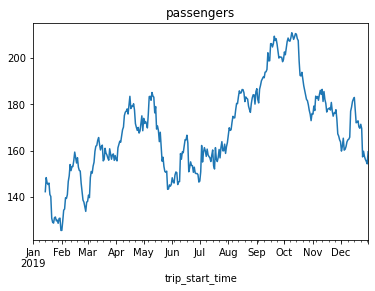

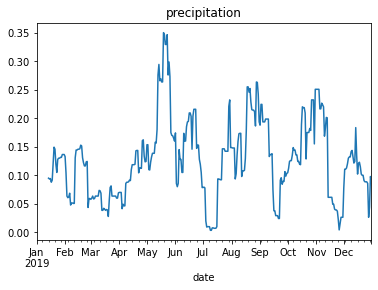

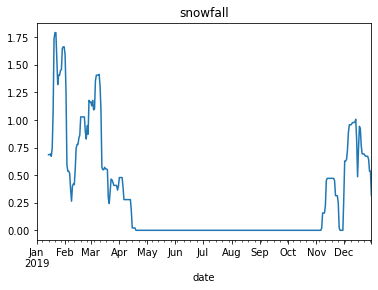

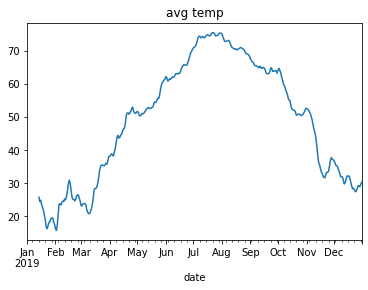

In [25]:
#now that number of days matches up, let's plot them to see what we get
stop_passengers = bus_stop.resample("D").sum()["passengers_on"]

plt.figure()
stop_passengers.rolling(14).mean().plot()
plt.title("passengers")
plt.figure()
weather2019.prcp.rolling(14).mean().plot()
plt.title("precipitation")
plt.figure()
weather2019.snow.rolling(14).mean().plot()
plt.title("snowfall")
plt.figure()
weather2019.tavg.rolling(14).mean().plot()
plt.title("avg temp")

**_Above:_** Across the four plots (number of passengers, precipitation amount, snowfall amount, and avg temps), there does seem to be some correlations. First off, it should be noted that the stop I am using, ID 17661, is the Centro Hub Bay for this route. This is important to keep in mind because the hub will provide a better indication of all bus travel, not purely this line, though of course it speaks to that as well.

It does appear that during the summer and winter months, ridership drops off the most. This may be explained by the departure of area college students, be they attending Syracuse or elsewhere; however, this does not tell the full story. The winter decline is greater than the summer one, meaning other factors are coming into play. For example, when snowfall is high and temperatures are low, the passenger count at this stop declines and even sets local minima.

Interestingly enough, it appears that precipitation has much less of an effect on ridership than previously anticipated. There don't seem to be any overall trends gorverning the ridership that correlate with any movement of precipitaion amounts. Perhaps the Syracusans are much mroe acclimated to rain than snow?

## Subtask 1.1 (10 pts.)

<AxesSubplot:xlabel='date'>

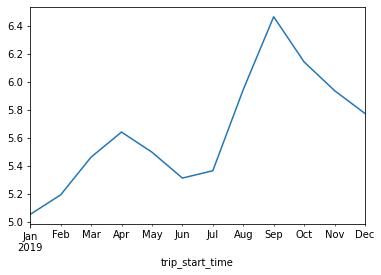

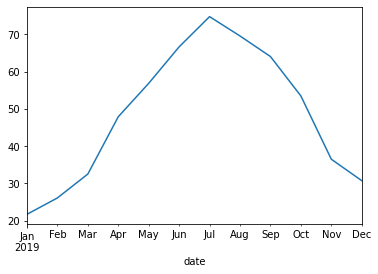

In [26]:
plt.figure()
bus_stop.resample("M").mean().passengers_on.plot() #monthly passengers avg
plt.figure()
weather2019.resample("M").mean().tavg.plot() #monthly avg temp

_**Above:**_ Montly averages are less telling than I would have assumed, primarily because it clears out too much noise, in my opinion. It also should be noted that the Centro Hub is covered, so when there is inclimate weather or low temperatures, there is at least some respite for the riders who do venture out. However, the ridership is still at its lowest during the winter and summer months, suggesting that the college ecosystem (students, professors, staff, etc) make up a large chunk of the riders who get on at this stop.

## Subtask 1.2 (10 pts.)

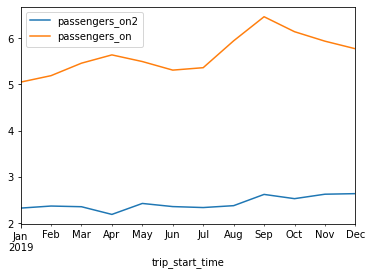

In [27]:
bus_stop2 = data_2019[data_2019.stop_id == 3761] #subset to get data on another bus stop
bus_stop2 = bus_stop2.reset_index() #reset index
bus_stop2["day"] = bus_stop2.trip_start_time.dt.date #grab date
bus_stop2 = bus_stop2.set_index("trip_start_time") #set index
bus_stop2 = bus_stop2[bus_stop2.day != datetime.date(2020, 1, 1)] #remove outlying date
bus_stop2["passengers_on2"] = bus_stop2["passengers_on"] #rename so they are labeled differently

plt.figure()
bus_stop2.resample("M").mean().passengers_on2.plot() #monthly CAMILLUS COMMONS riders
bus_stop.resample("M").mean().passengers_on.plot() #monthly CENTRO HUB riders
plt.legend()

_**Above:**_ Of course, the two stops are separated by a monthly average of about 3 to 4 passengers each time the bus stops at each given location; however, the two stops share, on the whole, a very similar trend in terms of passenger load. There is a large uptick when the college crowd returns around the end of August/early September, as well as a slight concave movement around summertime as well.

## Subtask 1.3 (10 pts.)

In [28]:
stops_2019.groupby(["stop_id"]).passengers_on.mean().sort_values(ascending = False)

stop_id
17661    167.396175
3761      80.587432
629       25.366120
727       24.368852
1114      22.374317
            ...    
854        0.002740
17657      0.000000
17659      0.000000
17640      0.000000
840        0.000000
Name: passengers_on, Length: 162, dtype: float64

_**Above:**_ I accidentally did this earlier while performing my other analyses, so I just copied the code down here for organizational sake.

# Task 2 (30 pts.)

In [29]:
data_19 = data2019 #copy the data
data_20 = data2020

data_19.columns = data_19.columns.str.lower() #rename columns
data_20.columns = data_19.columns.str.lower()

data_19 = data_19[data_19.stop_id == 17661] #subset for the stop id
data_20 = data_20[data_20.stop_id == 17661]

data_19.trip_start_time = pd.to_datetime(data_19.trip_start_time) #convert to datetime
data_20.trip_start_time = pd.to_datetime(data_20.trip_start_time)

data_19["day"] = data_19.trip_start_time.dt.date #extract date
data_20["day"] = data_20.trip_start_time.dt.date

data_19 = data_19.set_index("trip_start_time") #set index
data_20 = data_20.set_index("trip_start_time")

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/tmp/ipykernel_54/2891600719.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19["day"] = data_19.trip_start_time.dt.date
/tmp/ipykernel_54/2891600719.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

<AxesSubplot:xlabel='trip_start_time'>

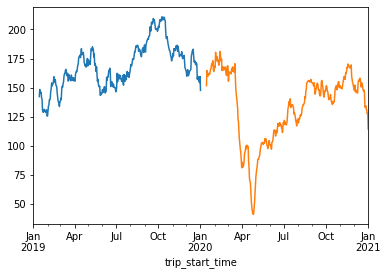

In [30]:
plt.figure() #plot each with a rolling 14 day mean
data_19.resample("D").sum().passengers_on.rolling(14).mean().plot()
data_20.resample("D").sum().passengers_on.rolling(14).mean().plot()

_**Above:**_ I have selected to use the Syracuse Centro Hub stop for this route, since it sees an overwhelmingly greater amount of passengers than the other stops due in part to the nature of a bus depot. 
[Transit Hub Bay Stop 17661](https://www.centro.org/docs/default-source/schedule-documents/syracuse-schedules/sy-36.pdf?sfvrsn=66884c9d_40)
<br><br><br>
_**Hypotheses:**_
1. H1: The COVID-19 Pandemic caused the vast majority of people to choose to travel a lot less, meaning fewer people had need to get to the transit hub
1. H2: Public transportation availability was lessened as a means of helping to control the developing situations of the summer BLM protests

## Subtask 2.1 (10 pts.)

_**Links to Source(s) for each Hypothesis:**_

- H1: [Global road transport activity was almost 50% below the 2019 average by the end of March 2020](https://www.iea.org/articles/changes-in-transport-behaviour-during-the-covid-19-crisis)
<br>
- H1: [a growing number of people are opting to avoid public transportation altogether](https://www.theverge.com/2020/3/13/21179032/public-transportation-coronavirus-covid19-ridership-nyc-sf-la-dc)
<br> <br>
- H2: [Centro will stop running buses at 7:40 p.m. tonight at the Syracuse Transit Hub](syracuse.com/crime/2020/05/centro-bus-service-will-close-early-in-syracuse-to-comply-with-new-curfew-in-onondaga-county.html)

## Subtask 2.2 (10 pts.)

In [31]:
weeks_19 = data2019 #copy the data
weeks_20 = data2020

weeks_19.columns = weeks_19.columns.str.lower() #rename the cols
weeks_20.columns = weeks_20.columns.str.lower()

weeks_19.trip_start_time = pd.to_datetime(weeks_19.trip_start_time) #convert to datetime
weeks_20.trip_start_time = pd.to_datetime(weeks_20.trip_start_time)

weeks_19["day"] = weeks_19.trip_start_time.dt.date #extract date
weeks_20["day"] = weeks_20.trip_start_time.dt.date

weeks_19 = weeks_19.set_index("trip_start_time") #set index
weeks_20 = weeks_20.set_index("trip_start_time")

In [32]:
display(weeks_19.groupby(["stop_id"]).resample("W").mean().passengers_on.sort_values(ascending=False).reset_index().stop_id.unique()[0:10])
display(weeks_20.groupby(["stop_id"]).resample("W").mean().passengers_on.sort_values(ascending=False).reset_index().stop_id.unique()[0:10])

array([17661,  3761,   629,  5426,   727,  7866,   885,  7642,   611,
       17677])

array([17661,  3761,   629,  6766, 17676, 14615,   727,  7642,   885,
       17823])

_**Above:**_ I wanted to challenge myself to see if I could perform this analysis without saving the intermediate steps. I know it is probably best practice to save as you go into different variables (for readability, reproduceability, etc.); however, I felt that if I could string them all together then I will have demonstrated to myself that I have a firm grasp on these techniques.
In terms of the actual code itself, I grouped each by stop id, resampled for a weekly mean, selected the column I wanted and sorted it, reset the index (to access the stop IDs again), selected the stop IDs, and then selected and printed the top 10 unique stop ID numbers.


_**Below:**_ The top 10 stops where passengers got on are listed below for each year (the stop ID has been converted to the actual stop location). Of note in 2020 are two examples -- those with the asterisks -- which gained in popularity over the course of the pandemic. Each of these sites housed testing and/or vaccination resources for COIVD-19, each of which are detailed in the links available above. 

Stop locations are per [Centro Bus Tracker](https://www.centro.org/misc-group/bus-tracker):

_2019:_
1. Hub Bay
1. Camillius Commons
1. W Genesee St & Lakeview Ave
1. S State St & Harrison St
1. W Genesee St & Westlind Rd
1. W Genesee St & Milton Ave
1. Camillus Village Hall
1. N Geddes St & Richmond Ave
1. W Genesee St & N Geddes St
1. E Washington St & S Warren St
<br>

_2020:_
1. Hub Bay
1. Camillius Commons
1. W Genesee St & Lakeview Ave
1. [S State St & Madison St](https://covid19.ongov.net/appointments/)*
1. E Washington St & Market St
1. Camillus Commons Lot
1. [W Genesee St & Westlind Rd](https://www.syracuse.com/coronavirus/2020/05/how-to-get-a-coronavirus-test-in-syracuse-locations-hours-cost-what-to-bring.html)*
1. N Geddes St & Richmond Ave
1. Camillus Village Hall
1. W Genesee St & Entrance to Camillus Commons

# Task 3 (15 pts.)

trip_start_time
2019-01-01    136.345
2019-01-02    421.777
2019-01-03    359.504
2019-01-04    356.709
2019-01-05    169.325
               ...   
2019-12-27    441.765
2019-12-28    148.107
2019-12-29    156.543
2019-12-30    429.142
2019-12-31    498.647
Freq: D, Name: segment_miles, Length: 365, dtype: float64

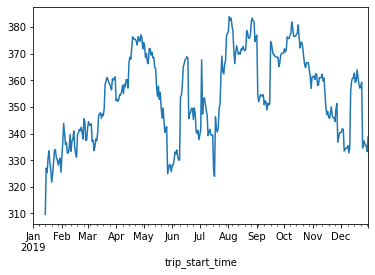

In [39]:
dist_2019 = data2019 #copy dataset
dist_2019.columns = dist_2019.columns.str.lower() #rename cols
dist_2019.trip_start_time = pd.to_datetime(dist_2019.trip_start_time) #convert to datetime
dist_2019["day"] = dist_2019.trip_start_time.dt.date #extract day part
dist_2019 = dist_2019.set_index("trip_start_time") #set index
dist_2019 = dist_2019[dist_2019.day != datetime.date(2020, 1, 1)] #remove outlying date
dist_2019.resample("D").sum().segment_miles.rolling(14).mean().plot() #plot rolling mean of daily sum
display(dist_2019.resample("D").sum().segment_miles) #print out daily totals

## Subtask 3.1 (10 pts.)

In [41]:
miles = dist_2019.resample("M").sum().segment_miles #get the monthly sum
miles*(3/7) #perform scalar multiplication across the series

trip_start_time
2019-01-31    4330.745571
2019-02-28    4071.360429
2019-03-31    4577.772857
2019-04-30    4785.390000
2019-05-31    4699.853571
2019-06-30    4354.103571
2019-07-31    4833.338143
2019-08-31    4964.341286
2019-09-30    4595.405571
2019-10-31    5009.100429
2019-11-30    4388.048571
2019-12-31    4642.752429
Freq: M, Name: segment_miles, dtype: float64